In [1]:
# Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import norm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", color_codes=True,)
sns.set(font_scale=1)

#Data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


#linear regression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#AND suppressing warning; they tend to ruin an easy overview
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


# 1. Exploratory Data Analysis

In [2]:
# read train and test dataset
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_target = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [3]:
# dropping ID column from dataframe
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Shape of training data

print("Training data set shape => (Rows, Columns)= ",train_df.shape)
print("Testing data set shape => (Rows, Columns)= ",test_df.shape)

Training data set shape => (Rows, Columns)=  (1460, 81)
Testing data set shape => (Rows, Columns)=  (1459, 80)


#### Checking numerical and catagorical input features in train and test datasets

In [6]:
def check_features_count():
    train_cols = train_df.columns
    test_cols = test_df.columns
    train_num_cols = train_df._get_numeric_data().columns
    test_num_cols = test_df._get_numeric_data().columns
    print("Train numerical columns \n",len(train_num_cols))
    print("Test numerical columns \n",len(test_num_cols))

    train_cat_cols = list(set(train_cols) - set(train_num_cols))
    test_cat_cols = list(set(test_cols) - set(test_num_cols))

    print('\n')
    print("Train catagorical columns \n",len(train_cat_cols))
    print("Test catagorical columns \n",len(test_cat_cols))

def check_features():
    train_cols = train_df.columns
    test_cols = test_df.columns
    train_num_cols = train_df._get_numeric_data().columns
    test_num_cols = test_df._get_numeric_data().columns

    train_cat_cols = list(set(train_cols) - set(train_num_cols))
    test_cat_cols = list(set(test_cols) - set(test_num_cols))
    
    return [train_num_cols,test_num_cols,train_cat_cols,test_cat_cols]

check_features_count()

Train numerical columns 
 38
Test numerical columns 
 37


Train catagorical columns 
 43
Test catagorical columns 
 43


In [7]:
  
stat_features_columns=check_features()
train_num_cols = stat_features_columns[0]
test_num_cols = stat_features_columns[1]
train_cat_cols = stat_features_columns[2]
test_cat_cols = stat_features_columns[3]

print("train_num_cols",train_num_cols)
print("\n test_num_cols",test_num_cols)
print("\n train_cat_cols",train_cat_cols)
print("\n test_cat_cols",test_cat_cols)

train_num_cols Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

 test_num_cols Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    

In [8]:
unique_count_list=[]
for col_name in train_cat_cols:
    temp = (col_name, train_df[col_name].nunique())
    unique_count_list.append(temp)
cat_unique_value_df = pd.DataFrame(data=unique_count_list,columns = ['cat_feature_column_names','unique_value_count'])

cat_unique_value_df.sort_values('unique_value_count',ascending=False)

,cat_feature_column_names,unique_value_count
18,Neighborhood,25
25,Exterior2nd,16
26,Exterior1st,15
31,Condition1,9
8,SaleType,9
39,Condition2,8
37,RoofMatl,8
11,HouseStyle,8
32,Functional,7
0,BsmtFinType2,6


In [9]:
# Total Feature column count

def features_with_dummy():
    cat_feature_column_count = cat_unique_value_df['unique_value_count'].sum()

    total_feature_column_count = len(train_num_cols)+cat_feature_column_count
    
    return total_feature_column_count

print("Total Feature column count before Feature Engineering = ",features_with_dummy())

Total Feature column count before Feature Engineering =  290


## >>>>>>>>>>>>>>>>>>>>>>>> Exploratory Data Analysis completed <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# 2. Missing Data Handling

In [10]:
train_test_df = pd.concat([train_df,test_df])
train_test_df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,WD,0,Pave,6,912.0,AllPub,80,1992,1992,2006


In [11]:
# Missing data analysis
def missing_data_analysis(dataset,title,col):
    list_missing_data = []

    for column_name in dataset:
        temp = (column_name,dataset[column_name].isnull().sum(),dataset[column_name].isnull().sum()/dataset.shape[0])
        list_missing_data.append(temp)

    missing_data_df = pd.DataFrame(data = list_missing_data, columns = ["feature_columns",col,"percent"])
    missing_data_df = missing_data_df[missing_data_df[col] > 0].sort_values(col,ascending=False)
    return missing_data_df
    
train_test_missing_df = missing_data_analysis(train_test_df,'dataset feature column missing data analysis','missing_count')    

train_test_missing_df

,feature_columns,missing_count,percent
66,PoolQC,2909,0.996574
57,MiscFeature,2814,0.964029
3,Alley,2721,0.932169
25,Fence,2348,0.804385
70,SalePrice,1459,0.499829
26,FireplaceQu,1420,0.486468
50,LotFrontage,486,0.166495
34,GarageFinish,159,0.054471
35,GarageQual,159,0.054471
37,GarageYrBlt,159,0.054471


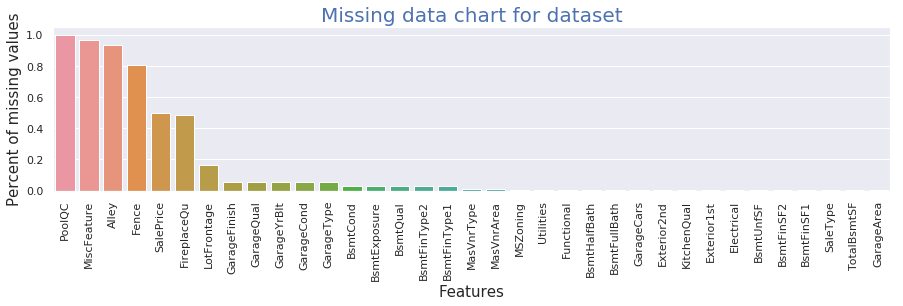

In [12]:
# Missing Data chart analysis

f, ax = plt.subplots(figsize=(15, 3))
plt.xticks(rotation='90')
sns.barplot(x=train_test_missing_df['feature_columns'], y=train_test_missing_df['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Missing data chart for dataset',color='b',size=20)
plt.show()
    
#missing_data_chart(data=train_missing_df,ax=1,suptitle="Train missing data chart")
#missing_data_chart(data=test_missing_df,ax=2,suptitle="Test missing data chart")

In [13]:
print("missing column count in data set: ",len(train_test_missing_df))
print()

list_missing_columns=list(train_test_missing_df['feature_columns'])
set_mis=set(list_missing_columns)
list_missing_columns=list(set_mis)
print("test and train missing columns: \n",list_missing_columns)

missing column count in data set:  35

test and train missing columns: 
 ['BsmtFinType2', 'BsmtQual', 'MSZoning', 'BsmtFullBath', 'SalePrice', 'MasVnrArea', 'KitchenQual', 'BsmtExposure', 'BsmtFinSF1', 'GarageCond', 'SaleType', 'BsmtFinType1', 'GarageFinish', 'Fence', 'BsmtCond', 'Alley', 'Electrical', 'GarageCars', 'BsmtHalfBath', 'PoolQC', 'Exterior2nd', 'Exterior1st', 'GarageType', 'Utilities', 'Functional', 'MasVnrType', 'TotalBsmtSF', 'LotFrontage', 'BsmtFinSF2', 'GarageQual', 'MiscFeature', 'BsmtUnfSF', 'FireplaceQu', 'GarageArea', 'GarageYrBlt']


## Detailed analysis of missing values in Train and Test Dataset

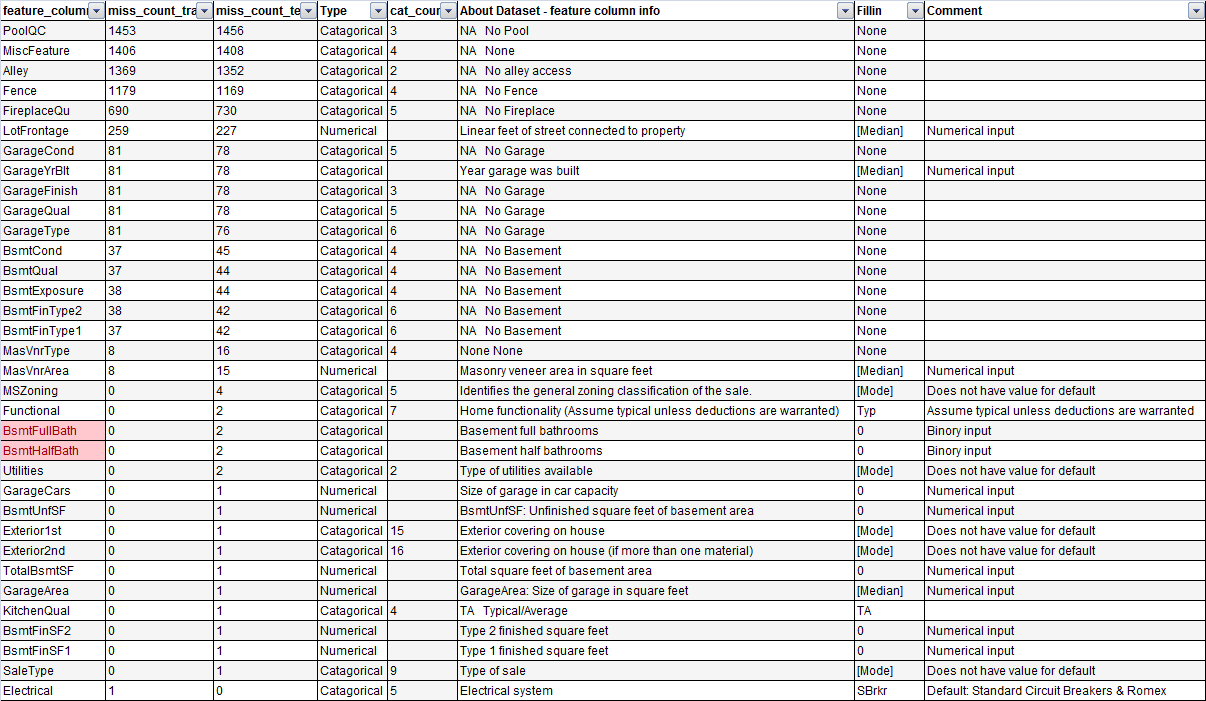

In [14]:
None_to_columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
zero_to_columns=['BsmtFullBath','BsmtHalfBath','GarageCars','BsmtUnfSF','TotalBsmtSF','BsmtFinSF2','BsmtFinSF1','SalePrice']
median_to_columns=['LotFrontage','MasVnrArea','GarageArea']
mode_to_columns=['MSZoning','Exterior1st','Exterior2nd','SaleType','Utilities','GarageYrBlt']
# GarageYrBlt is ordinal numerical value, hence it will changed to catagorical feature. 

def fillna(feature_columns,dataset,value):
    for col in feature_columns:
        dataset[col]=dataset[col].fillna(value)
        
def fillna_med(feature_columns,dataset):
    for col in feature_columns:
        dataset[col]=dataset[col].fillna(dataset[col].median())
        
def fillna_mode(feature_columns,dataset):
    for col in feature_columns:
        dataset[col]=dataset[col].fillna(dataset.loc[:,col].mode()[0])     
        
        
fillna(feature_columns=None_to_columns,dataset=train_test_df,value="None")

fillna(feature_columns=zero_to_columns,dataset=train_test_df,value=0)

fillna_med(feature_columns=median_to_columns,dataset=train_test_df)

fillna_mode(feature_columns=mode_to_columns,dataset=train_test_df)


train_test_df['Functional']=train_test_df['Functional'].fillna('Typ')
train_test_df['KitchenQual']=train_test_df['KitchenQual'].fillna('TA')
train_test_df['Electrical']=train_test_df['Electrical'].fillna('SBrkr')


In [15]:
train_df = train_test_df[train_test_df['Id']<1461]
test_df = train_test_df[train_test_df['Id']>1460]

In [16]:
missing_data_analysis(train_df,'dataset feature column missing data analysis','missing_count')

,feature_columns,missing_count,percent


## >>>>>>>>>>>>>>>>>>>>>>>> Data cleaning completed  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


# 3. Feature Engineering

In [17]:
Ordinal_train_df = train_df[['YearBuilt','YearRemodAdd','GarageYrBlt']].copy()
Ordinal_train_df['que1'] = Ordinal_train_df['YearBuilt'][(Ordinal_train_df['YearBuilt'] >= Ordinal_train_df['YearRemodAdd']) & (Ordinal_train_df['YearBuilt'] <= Ordinal_train_df['GarageYrBlt'])]
Ordinal_train_df['que2'] = Ordinal_train_df['YearBuilt'][(Ordinal_train_df['YearBuilt'] >= Ordinal_train_df['YearRemodAdd'])]
Ordinal_train_df['que3'] = Ordinal_train_df['YearBuilt'][(Ordinal_train_df['YearBuilt'] <= Ordinal_train_df['GarageYrBlt'])]
Ordinal_train_df['que4'] = Ordinal_train_df['YearRemodAdd'][(Ordinal_train_df['YearRemodAdd'] <= Ordinal_train_df['GarageYrBlt'])]
Ordinal_train_df.isnull().sum()

YearBuilt         0
YearRemodAdd      0
GarageYrBlt       0
que1            702
que2            696
que3             11
que4            535
dtype: int64

* Only 11 houses are not built the garage the same year the house built. so we can elimate the GarageYrBlt

In [18]:
train_df.drop(['GarageYrBlt'], axis=1,inplace=True)
test_df.drop(['GarageYrBlt'], axis=1,inplace=True)

As per test data description **MSSubClass** is "The building class", hence this is supposed to be Catagorical input. so this should be changed to str type.

**MSSubClass**,**'YearBuilt'**, **YearRemodAdd'**,**'MoSold'**, **'YrSold'** are catagorical input column feature but they are ordinal.

In [19]:
convert_dict = {'MSSubClass': str, 
                'YearBuilt': str,
                'YearRemodAdd': str, 
                'MoSold': str,
                'YrSold': str
               } 
  
train_df = train_df.astype(convert_dict)
test_df = test_df.astype(convert_dict)

In [20]:
stat_features_columns=check_features()
train_num_cols = stat_features_columns[0]
test_num_cols = stat_features_columns[1]
train_cat_cols = stat_features_columns[2]
test_cat_cols = stat_features_columns[3]

print("train_num_cols",train_num_cols)
print("\n test_num_cols",test_num_cols)
print("\n train_cat_cols",train_cat_cols)
print("\n test_cat_cols",test_cat_cols)

train_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

 test_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
  

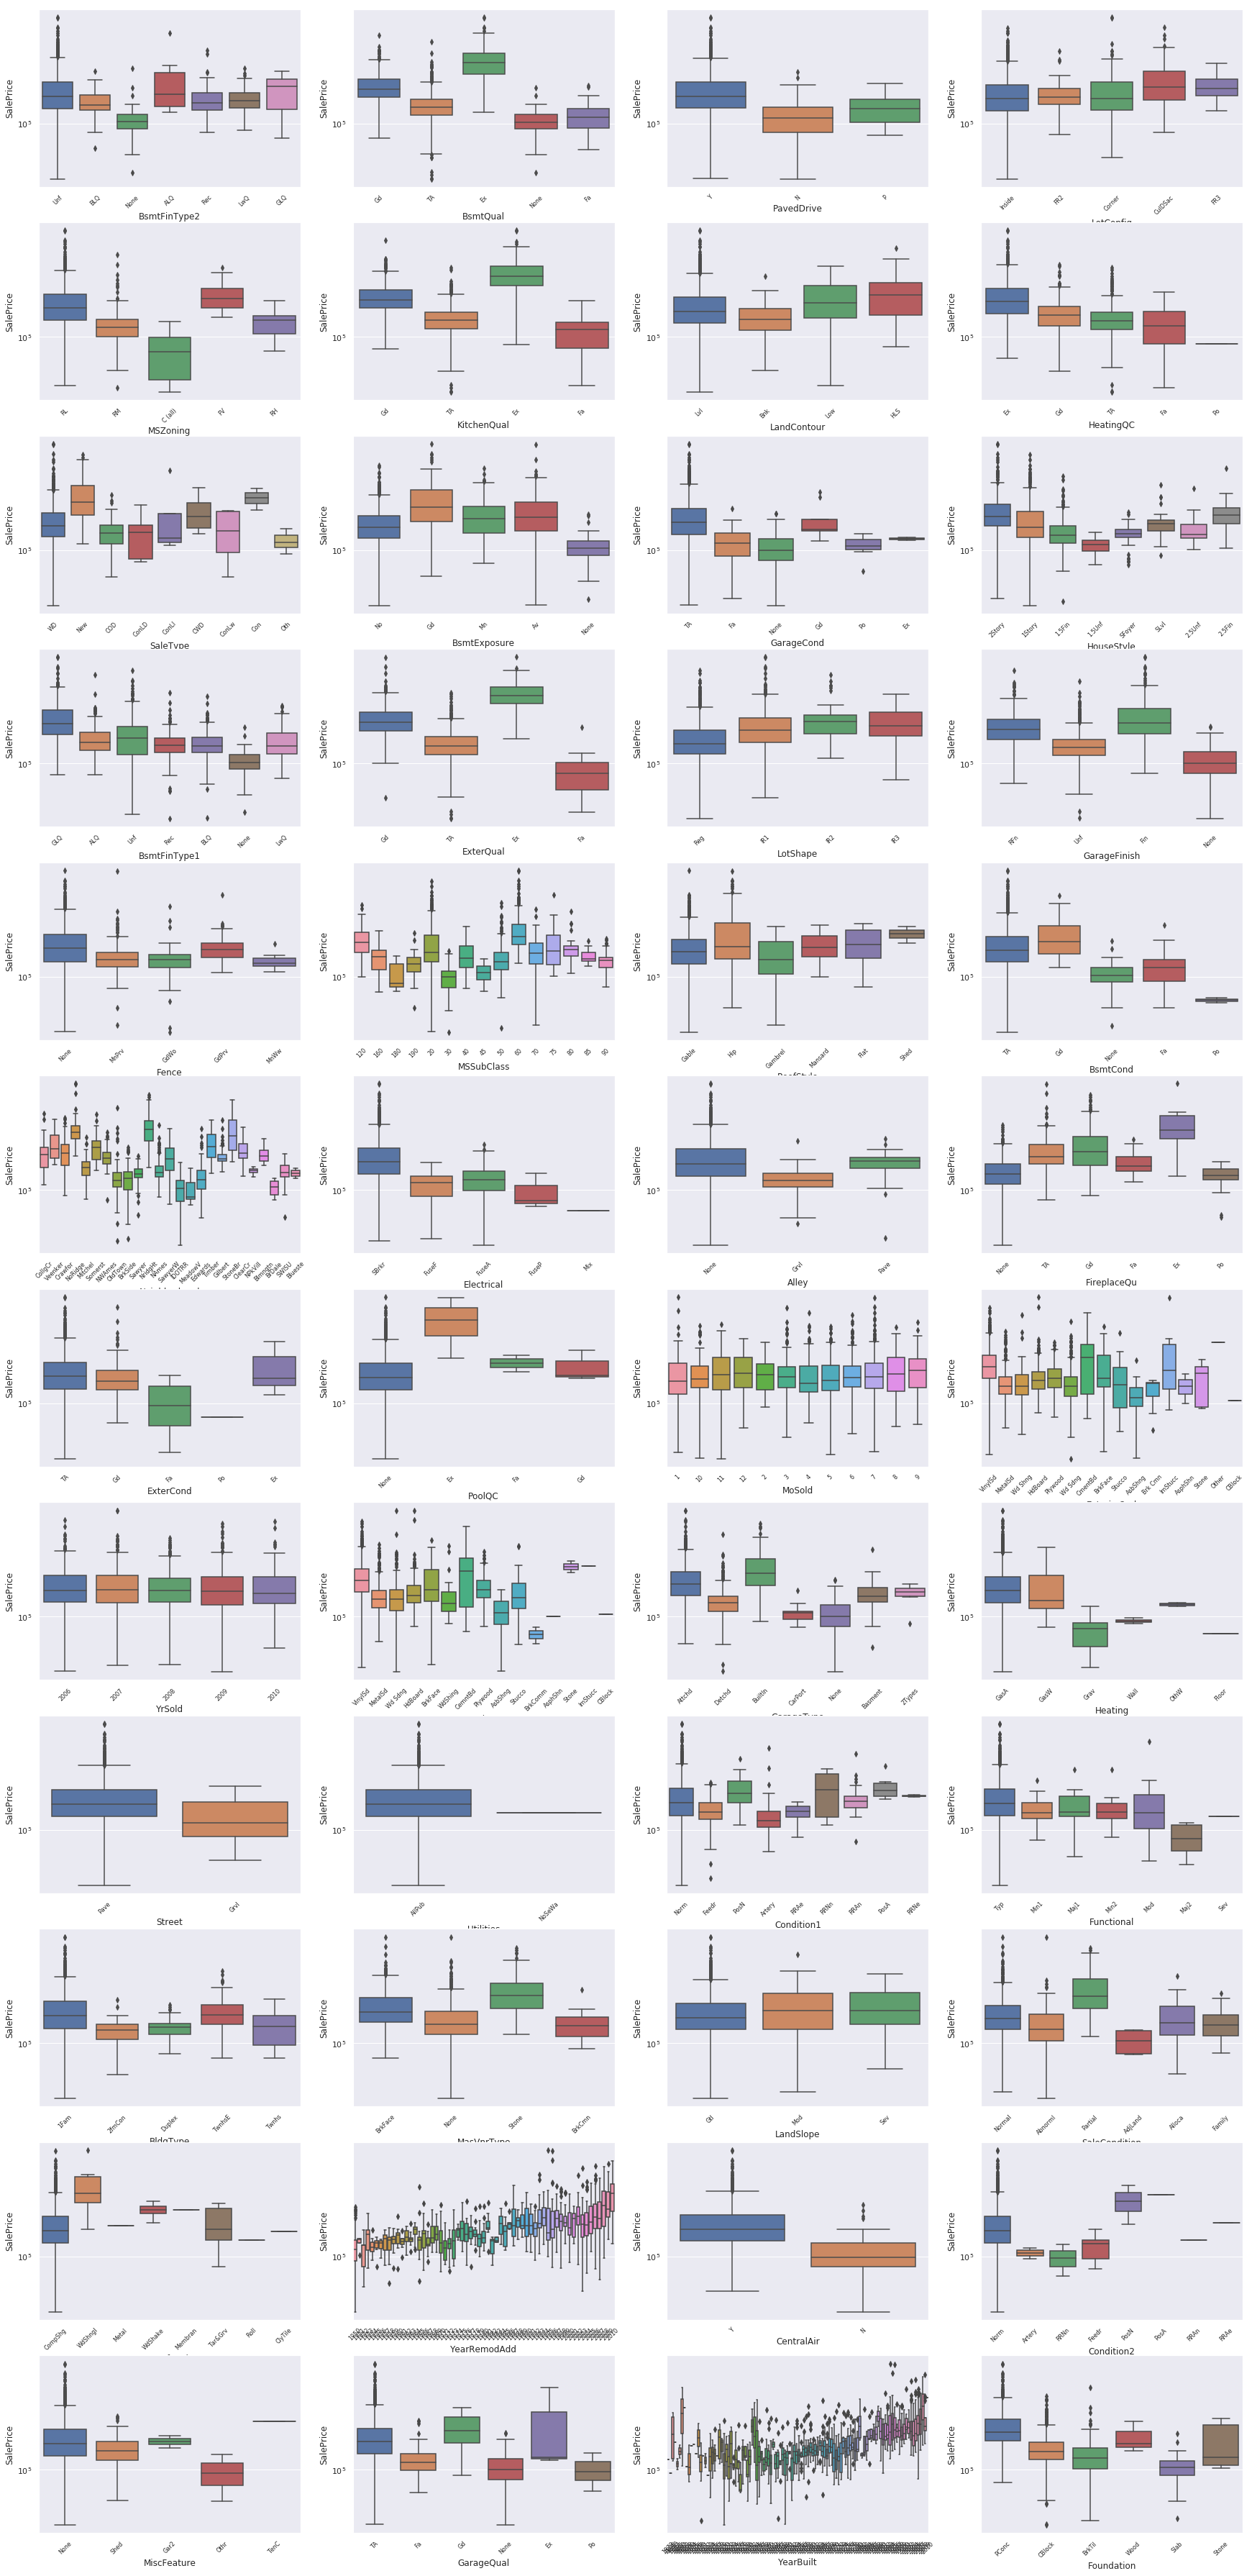

In [21]:
i = 1
plt.figure(figsize = (30,70))

for col in train_cat_cols:
    plt.subplot(13,4,i)
    sns.boxplot(x = train_df[col],y=train_df['SalePrice'])
    i=i+1
    plt.xticks(rotation='45',size=8)
    plt.yscale('log')

plt.show()

From the above chart following data are inbalanced or no effect to Saleprice (Target variable) so the feature will create noise to the target variable, hence dropping those feature columns
* Utilities
* Condition2
* RoofMatl
* YrSold
* MoSold


In [22]:
train_df.drop(['Utilities','Condition2','RoofMatl','YrSold','MoSold'],axis=1,inplace=True)
test_df.drop(['Utilities','Condition2','RoofMatl','YrSold','MoSold'],axis=1,inplace=True)

check_features_count()

Train numerical columns 
 32
Test numerical columns 
 32


Train catagorical columns 
 43
Test catagorical columns 
 43


## Correlation matrix 

Text(0.5, 1.0, 'Correlated Matrix of quantitative inputs')

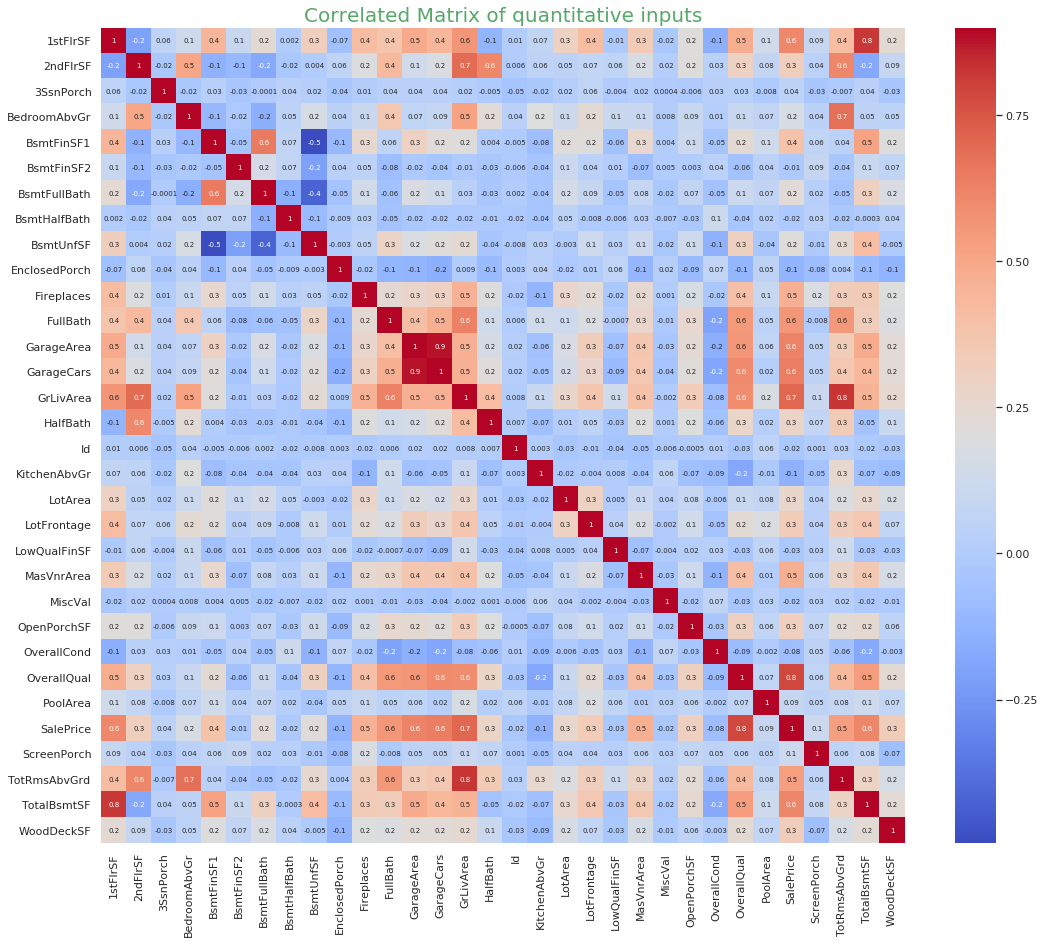

In [23]:
# pearson Correlated matrix
f, ax = plt.subplots(figsize=(18, 15))

corr_matrix = train_df.corr(method ='pearson')

sns.heatmap(corr_matrix,annot=True,annot_kws={'size': 7},vmax=.9,fmt=".1g",cmap='coolwarm',ax=ax,)
plt.title("Correlated Matrix of quantitative inputs", size = 20,color = 'g')


GarageArea and GarageCars are 90% correlelated, hence we can remove GarageCars from feature columns

In [24]:
train_df.drop(['GarageCars'],axis=1,inplace=True)
test_df.drop(['GarageCars'],axis=1,inplace=True)

### Numerical column features relationship with Saleprice

In [25]:
stat_features_columns=check_features()
train_num_cols = stat_features_columns[0]
test_num_cols = stat_features_columns[1]
train_cat_cols = stat_features_columns[2]
test_cat_cols = stat_features_columns[3]


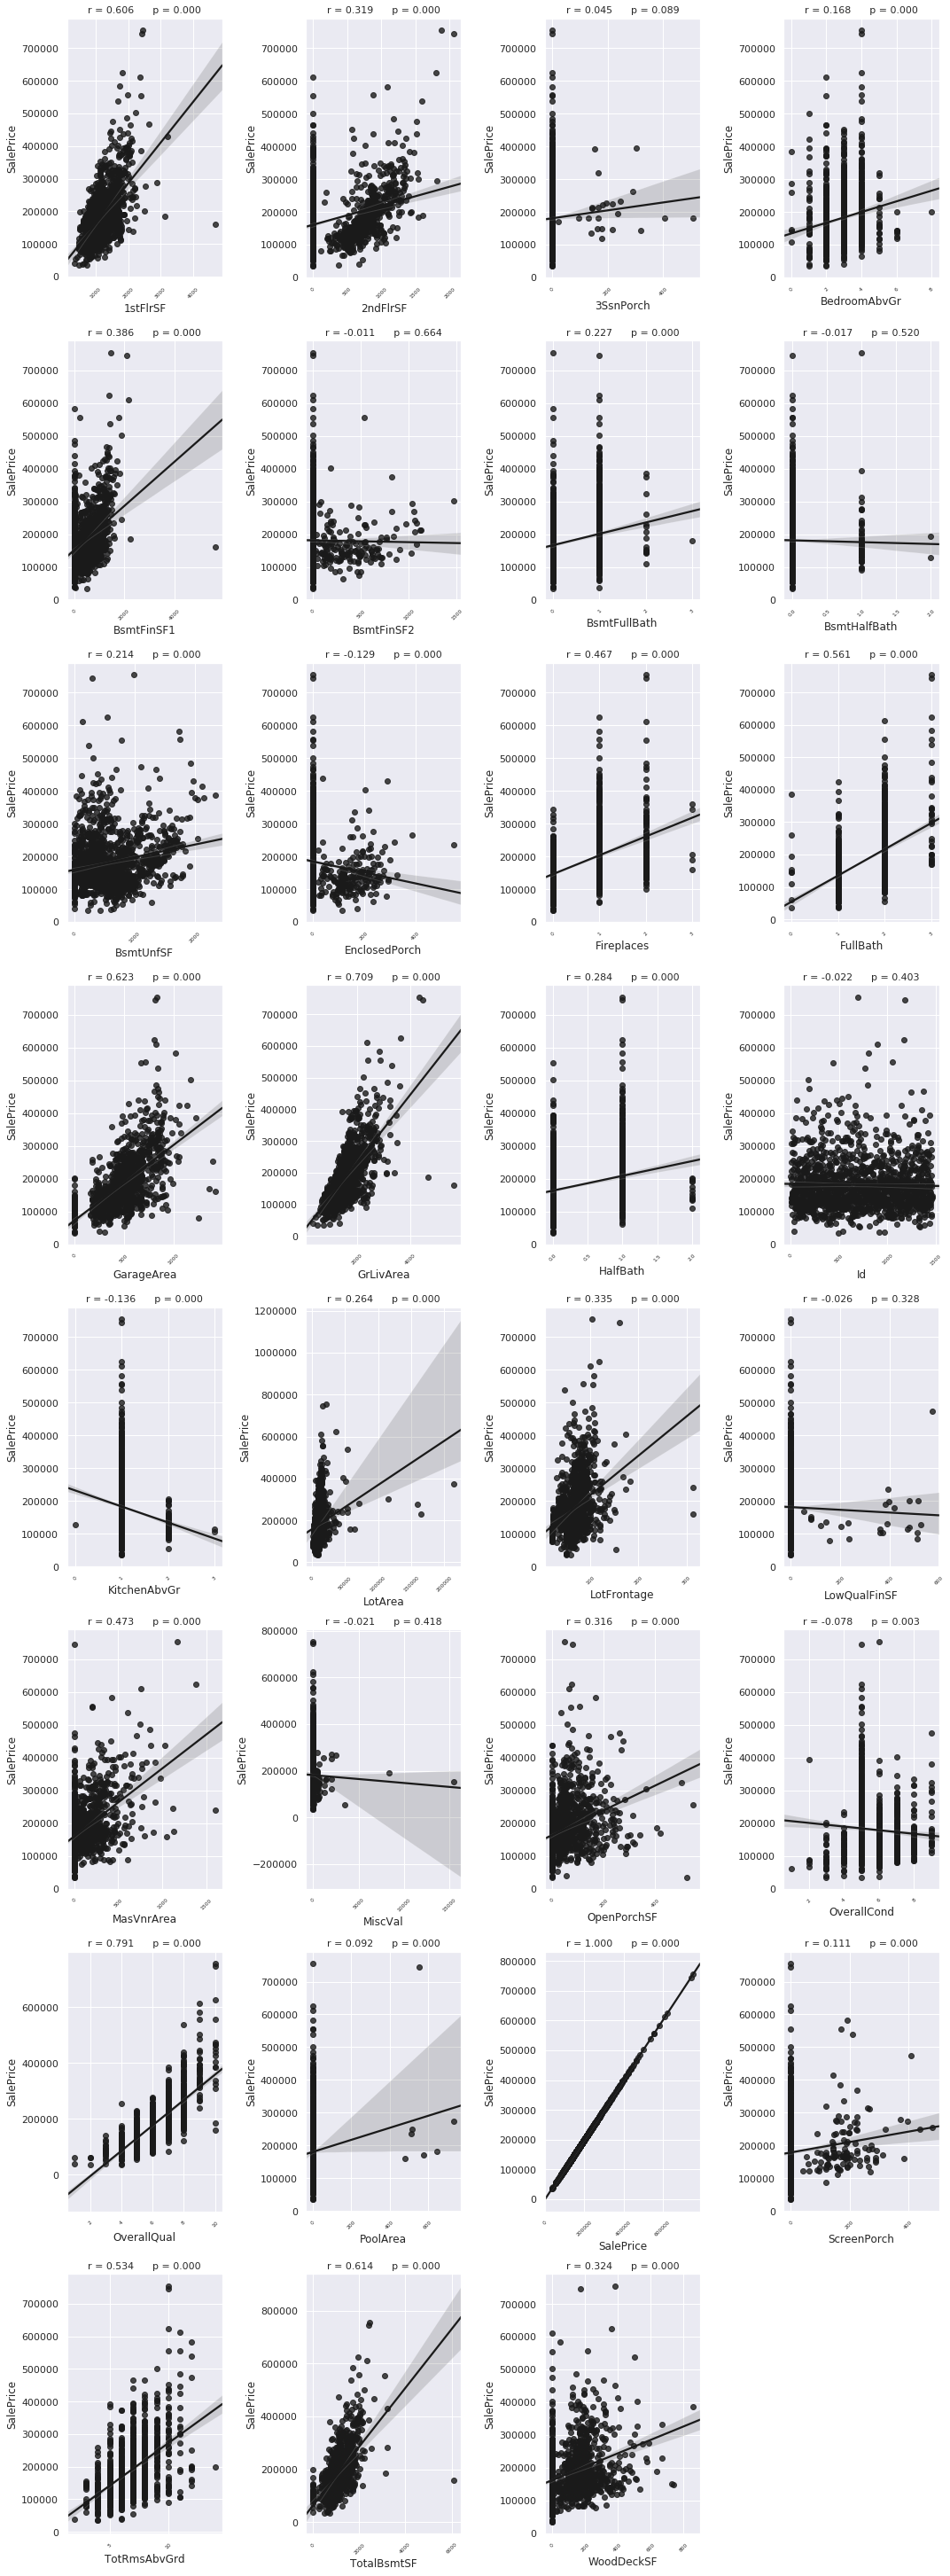

In [26]:
i = 1
plt.figure(figsize = (15,50))

for col in train_num_cols:
    plt.subplot(10,4,i)
    sns.regplot(x = train_df[col],y=train_df['SalePrice'],color=".1")
    i=i+1
    stp = stats.pearsonr(train_df[col], train_df['SalePrice'])
    str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
    plt.title(str_title,fontsize=11)
    plt.xticks(rotation='45',size=6)

    plt.tight_layout() 
plt.show()


In [27]:
stat_features_columns=check_features()
train_num_cols = stat_features_columns[0]
test_num_cols = stat_features_columns[1]
train_cat_cols = stat_features_columns[2]
test_cat_cols = stat_features_columns[3]

print("train_num_cols",train_num_cols)
print("\n test_num_cols",test_num_cols)
print("\n train_cat_cols",train_cat_cols)
print("\n test_cat_cols",test_cat_cols)

train_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea',
       'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

 test_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea',
       'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDec

In [28]:
collist=[]
lists=[]
for col in train_num_cols: 
    temp = train_df[col].astype(int)
    r,p = stats.pearsonr(temp, train_df['SalePrice'])
    if int(round(p, 2)*100)>5:
        lists.append((col,round(p, 2), int(round(p, 2)*100)))
        collist.append(col)
df=pd.DataFrame(lists,columns=[col,'p value','p %']).sort_values('p %',ascending=False)
df

,WoodDeckSF,p value,p %
1,BsmtFinSF2,0.66,66
2,BsmtHalfBath,0.52,52
5,MiscVal,0.42,42
3,Id,0.40,40
4,LowQualFinSF,0.33,33
0,3SsnPorch,0.09,9


Text(0.5, 0, 'Correlation against SalePrice')

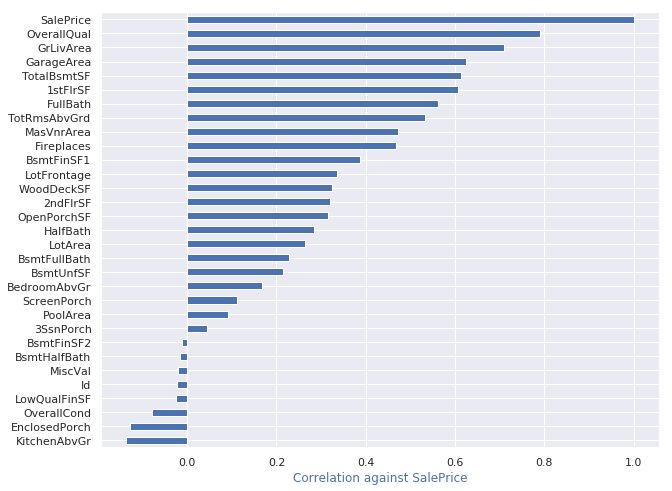

In [29]:
corr_matrix_with_SalePrice = train_df.corr()['SalePrice']

plt.figure(figsize=(10,8))
corr_matrix_with_SalePrice.sort_values(axis=0,ascending=True).plot(kind='barh')
plt.xlabel('Correlation against SalePrice',color='b')

In [30]:
corr_matrix_with_SalePrice=corr_matrix_with_SalePrice.where(corr_matrix_with_SalePrice>0.50).dropna()
corr_matrix_with_SalePrice=corr_matrix_with_SalePrice.sort_values(ascending=True)
corr_matrix_with_SalePrice

TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [31]:
high_corr_df = corr_matrix_with_SalePrice.to_frame()
high_corr_features = high_corr_df.index
print(high_corr_features)

Index(['TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'GrLivArea', 'OverallQual', 'SalePrice'],
      dtype='object')


**From the above figures:**

Below columns have less than 0.05 P-value and less correlation against SalePrice (target variable). those can be dropped due to strong null hypotheisis or these feature are not significant to target output or create noise to the data set.

* BsmtFinSF2 
* BsmtHalfBath
* MiscVal
* Id
* LowQualFinSF
* 3SsnPorch



In [32]:
stat_features_columns=check_features()
train_num_cols = stat_features_columns[0]
test_num_cols = stat_features_columns[1]
train_cat_cols = stat_features_columns[2]
test_cat_cols = stat_features_columns[3]

print("train_num_cols",train_num_cols)
print("\n test_num_cols",test_num_cols)
print("\n train_cat_cols",train_cat_cols)
print("\n test_cat_cols",test_cat_cols)

train_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea',
       'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

 test_num_cols Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GrLivArea',
       'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'SalePrice', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDec

In [33]:
for col in collist:
    if col == 'Id':
        pass
        # Id will be dropped before modelling
    else:
        train_df.drop([col],axis=1,inplace=True)
        test_df.drop([col],axis=1,inplace=True)

## Outliers

In [34]:
high_corr_features

Index(['TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea',
       'GrLivArea', 'OverallQual', 'SalePrice'],
      dtype='object')

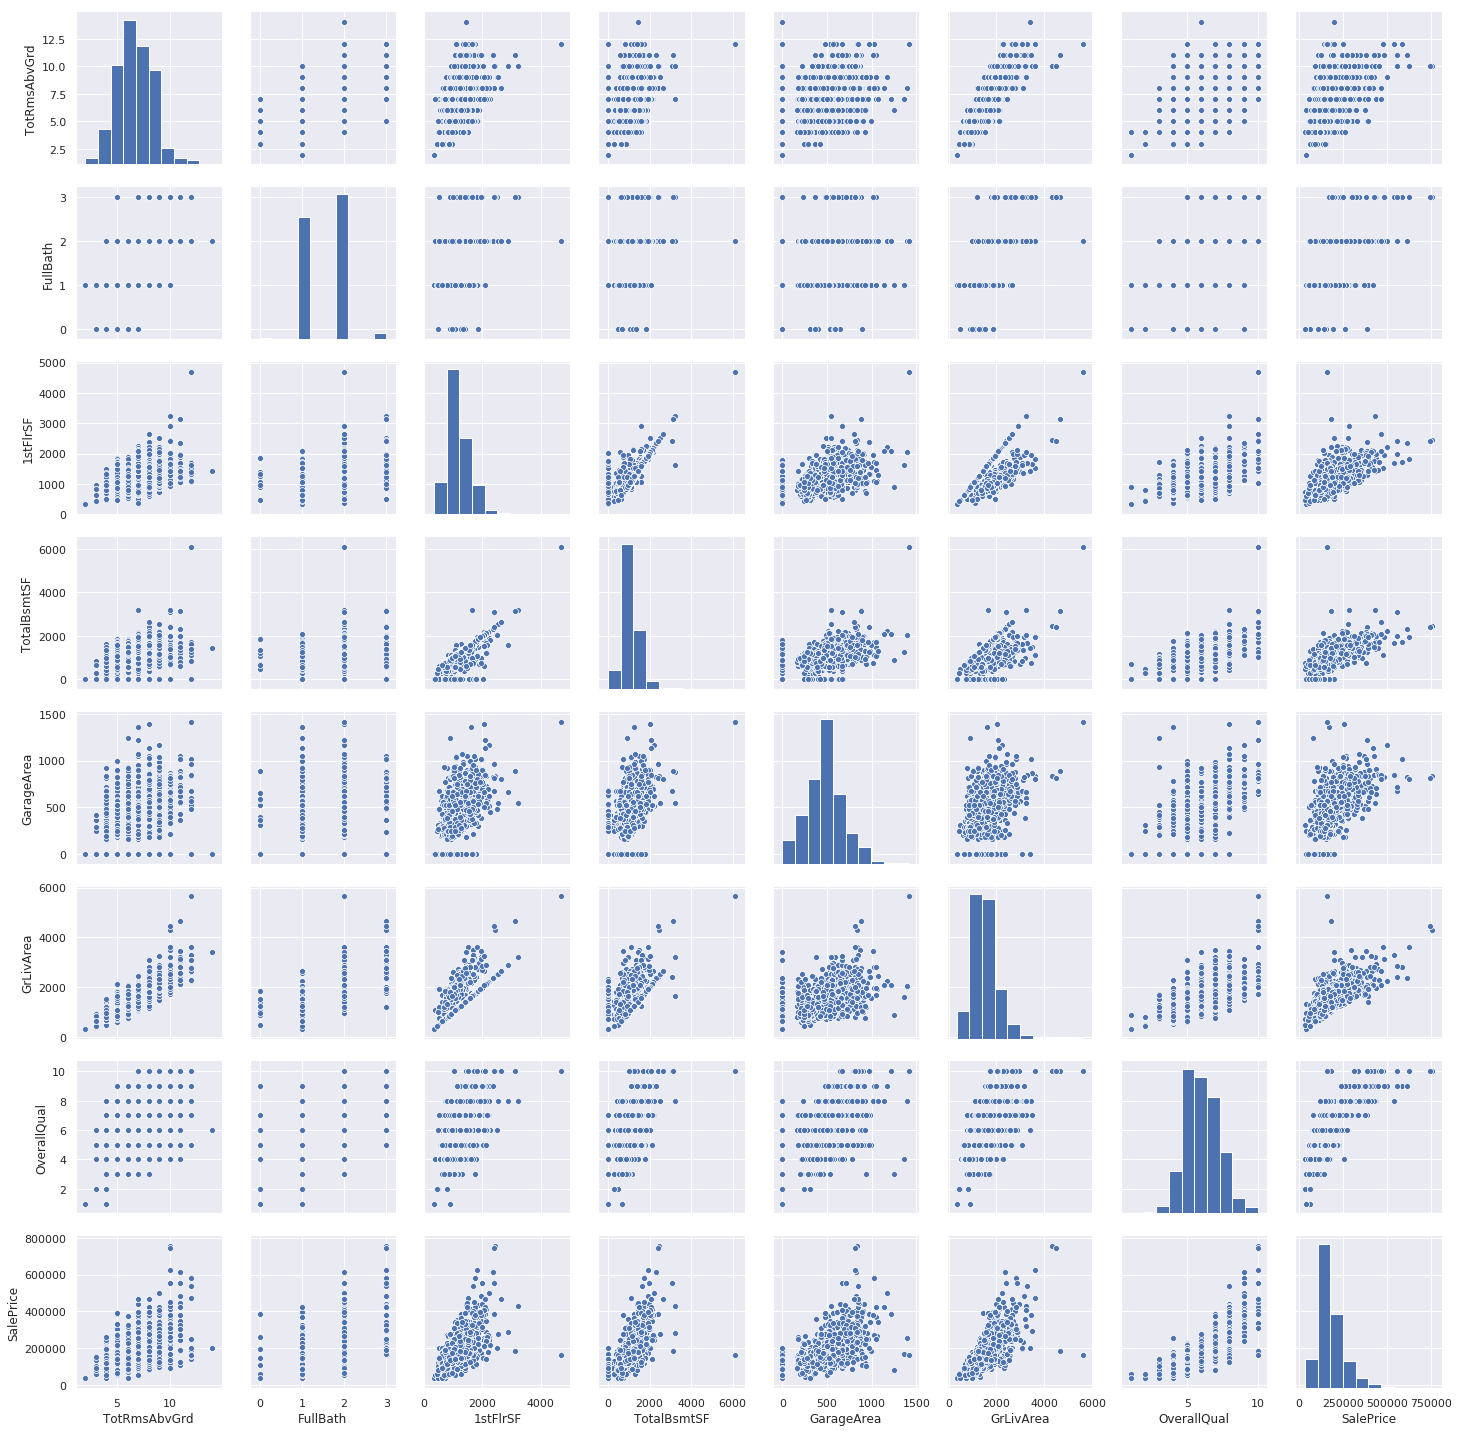

In [35]:
sns.pairplot(train_df[high_corr_features],size = 2.5)
plt.show()

#### as per above pair plot, outliers are

* 1stFlrSF above 3000 
* GrLivArea above 4000 
* SalePrice above 400000 

Removing the above outliers

## Feature Extraction

In [36]:
def feature_engg(df):
    
    df['total_area'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea']
    df['porch_area'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']
    df['total_bathroom'] = df['BsmtFullBath'] + df['FullBath'] + (df['HalfBath']*0.5)
    
    
    df['has_pool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['has_2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['has_garage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['has_bsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['has_fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    print("Before dropping",df.shape)
    drop_list = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',\
                 'WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch',\
                 'BsmtFullBath','FullBath','HalfBath',\
                 'PoolArea','2ndFlrSF','GarageArea','TotalBsmtSF','Fireplaces']
    df=df.drop(drop_list,axis=1)
    print("After dropping",df.shape)
    
    return df

train_df = feature_engg(train_df)
test_df = feature_engg(test_df)


Before dropping (1460, 77)
After dropping (1460, 63)
Before dropping (1459, 77)
After dropping (1459, 63)


## Distribution of sale prices

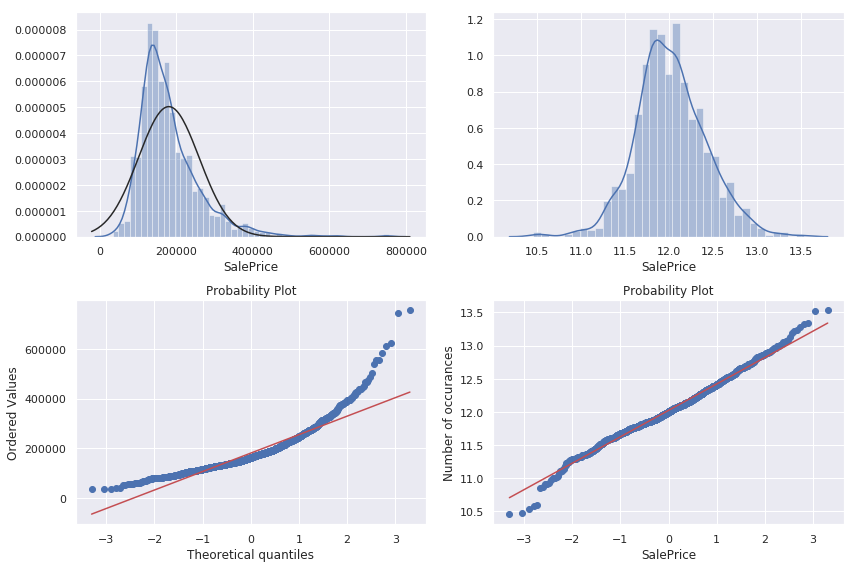

In [37]:
# Distribution of sale prices

f, ax = plt.subplots(2,2,figsize=(12, 8))

sns.distplot(train_df['SalePrice'],fit=norm, color='b',ax=ax[0][0])
sns.distplot(np.log1p(train_df['SalePrice']),color='b',ax=ax[0][1])
stats.probplot(train_df['SalePrice'],plot=ax[1][0])
stats.probplot(np.log1p(train_df['SalePrice']),plot=ax[1][1])
plt.xlabel('SalePrice')
plt.ylabel('Number of occurances')
plt.tight_layout()

> fig 0,0 diagram shows the salary distribution is positive skewness

> fig 0,1 diagram shows the logarithmic of sales in normal distribution

> fig 1,1 diagram shows the sales in probability chart highly deviates from the line

> fig 1,1 diagram shows the logarithmic of sales are fit to nor

### Handling the skewness
> Normal distribution target will have good result


In [38]:
train_df['SalePrice']= np.log1p(train_df["SalePrice"])


## >>>>>>>>>>>>>>>>>>>>>>>> Feature engineering completed <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# 4. Model Data Preparation

In [39]:
#importing the necessary libraries
# from sklearn.preprocessing import LabelEncoder

# #getting categorical variables
# cat_feat = list(train_df.dtypes[train_df.dtypes == 'object'].index)

# #Encoding the categorical variables
# for c in cat_feat:
#     lbl = LabelEncoder() 
#     lbl.fit(list(train_df[c].values)) 
#     train_df[c] = lbl.transform(list(train_df[c].values))
# print(train_df.shape)
# train_df.describe()

In [40]:
#Concat and splitting so we get match columns after get_dummies
train_test_df = pd.concat([train_df,test_df])
train_test_df

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtUnfSF,...,YearBuilt,YearRemodAdd,total_area,porch_area,total_bathroom,has_pool,has_2ndfloor,has_garage,has_bsmt,has_fireplace
0,None,3,1Fam,TA,No,706.0,GLQ,Unf,Gd,150.0,...,2003,2003,4276.0,61,3.5,0,1,1,1,0
1,None,3,1Fam,TA,Gd,978.0,ALQ,Unf,Gd,284.0,...,1976,1976,3786.0,298,2.0,0,0,1,1,1
2,None,3,1Fam,TA,Mn,486.0,GLQ,Unf,Gd,434.0,...,2001,2002,4492.0,42,3.5,0,1,1,1,1
3,None,3,1Fam,Gd,No,216.0,ALQ,Unf,TA,540.0,...,1915,1970,4190.0,307,2.0,0,1,1,1,1
4,None,4,1Fam,TA,Av,655.0,GLQ,Unf,Gd,490.0,...,2000,2000,5541.0,276,3.5,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,3,Twnhs,TA,No,0.0,Unf,Unf,TA,546.0,...,1970,1970,2730.0,0,1.5,0,1,0,1,0
1455,None,3,TwnhsE,TA,No,252.0,Rec,Unf,TA,294.0,...,1970,1970,2730.0,24,1.5,0,1,1,1,0
1456,None,4,1Fam,TA,No,1224.0,ALQ,Unf,TA,0.0,...,1960,1996,3672.0,474,2.0,0,0,1,1,1
1457,None,3,1Fam,TA,Av,337.0,GLQ,Unf,Gd,575.0,...,1992,1992,2852.0,112,1.0,0,0,0,1,0


In [41]:
# Get dummy variables to all catagorical columns
print("shape of train_test_df before cat to dummy variable",train_test_df.shape)

train_test_df = pd.get_dummies(train_test_df,drop_first=True)

print("shape of train_test_df before cat to dummy variable",train_test_df.shape)

train_test_df.head()

shape of train_test_df before cat to dummy variable (2919, 63)
shape of train_test_df before cat to dummy variable (2919, 420)


,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,Id,KitchenAbvGr,LotArea,LotFrontage,MasVnrArea,OverallCond,OverallQual,...,YearRemodAdd_2001,YearRemodAdd_2002,YearRemodAdd_2003,YearRemodAdd_2004,YearRemodAdd_2005,YearRemodAdd_2006,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010
0,3,706.0,150.0,1,1,8450,65.0,196.0,5,7,...,0,0,1,0,0,0,0,0,0,0
1,3,978.0,284.0,2,1,9600,80.0,0.0,8,6,...,0,0,0,0,0,0,0,0,0,0
2,3,486.0,434.0,3,1,11250,68.0,162.0,5,7,...,0,1,0,0,0,0,0,0,0,0
3,3,216.0,540.0,4,1,9550,60.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,4,655.0,490.0,5,1,14260,84.0,350.0,5,8,...,0,0,0,0,0,0,0,0,0,0


Instead of using Label and One Hot encoder, pd.get_dummies will do the same job

In [42]:
train_df = train_test_df[train_test_df['Id']<1461]
test_df = train_test_df[train_test_df['Id']>1460]

In [43]:
X = train_test_df[train_test_df['Id']<1461]
y = X["SalePrice"]
X = X.drop(["SalePrice",'Id'],axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 418)
(292, 418)
(1168,)
(292,)


## Feature scalling

In [46]:
# def feature_scale(df):
#     sc = StandardScaler()
#     return sc.fit_transform(df)
# X_train[X_train.columns] = feature_scale(X_train[X_train.columns])


In [47]:
# #importing minmax scaler from sklearn.preprocessing and scaling the training dataframe
# from sklearn.preprocessing import MinMaxScaler
# def feature_scale_minmax(df):
#     sc_minmax = MinMaxScaler()
#     return sc_minmax.fit_transform(df)
# X_train[X_train.columns] = feature_scale_minmax(X_train[X_train.columns])
# X_train.describe()

In [48]:
# X_test[X_test.columns] = feature_scale_minmax(X_test[X_test.columns])
# X_test.describe()

########################### Data preparation completed #################################

# 5. Modelling

# 5.1 Scikit Linear regression

In [49]:
sk_linear_reg = LinearRegression()

sk_linear_reg.fit(X = X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_pred_sk_Linear = sk_linear_reg.predict(X_test)
print(len(y_pred_sk_Linear))

292


In [51]:
for y in y_pred_sk_Linear:
    print(np.expm1(y))

195031.997848297
327428.5503665546
97511.0935056001
167534.44819789735
307484.461449521
79252.95419854687
233704.60486195423
147458.761673732
77093.80890928031
148174.11813551156
150760.38650111342
126820.51182444429
60636.01634323687
230041.28541033878
172004.95006863773
127842.32923490199
194506.35163003305
127748.66940102825
99238.1339756335
211164.88110186122
150069.90219888184
221713.84569588793
178636.98403902084
163456.0708317011
199077.70656567346
147415.6828158663
194023.8865882273
113679.52683929141
162153.31767902581
207223.45338345488
145046.7907482178
276027.6402293993
154482.84861864898
116806.88141121031
249890.40896554632
148442.25367747317
171042.31209092092
204949.7652985124
296324.0536191931
106265.32524484456
102193.71848147857
210609.06533641505
108146.67952044905
381458.6145933437
127207.88680229141
156349.45069952653
107313.11722597649
150448.94607797236
456642.09363452153
123334.83749454565
121313.23300157554
198345.77569962537
106826.50456735856
250458.65710314

In [52]:
print("Scikit learn linear regression - Goodness score - R**2 value = ", sk_linear_reg.score(X_train,y_train))

Scikit learn linear regression - Goodness score - R**2 value =  0.9402602335374133


In [53]:
test_pred_table_linear={"y_test":list(np.expm1(y_test)),"y_pred":list(np.expm1(y_pred_sk_Linear))}

test_pred_table_linear = pd.DataFrame.from_dict(test_pred_table_linear)
test_pred_table_linear['difference']=test_pred_table_linear['y_test']-test_pred_table_linear['y_pred']
test_pred_table_linear['error_percent']=abs(test_pred_table_linear['difference']/test_pred_table_linear['y_test'])*100

print("Error percentage mean from test data",test_pred_table_linear['error_percent'].mean())
test_pred_table_linear.describe()


Error percentage mean from test data 11.932413832504746


,y_test,y_pred,difference,error_percent
count,292.000000,292.000000,292.000000,292.000000
mean,178839.811644,176340.239984,2499.571660,11.932414
std,87730.751259,77794.383350,31573.985920,13.990320
min,35311.000000,49965.642836,-164779.386646,0.042230
25%,127000.000000,123737.446090,-10284.230876,3.882210
50%,154150.000000,159220.329156,2170.192076,7.712082
75%,209175.000000,209339.091722,14574.867601,14.441880
max,755000.000000,624813.948024,194160.931183,95.045660


In [54]:
test_pred_table_linear.sort_values('error_percent')

,y_test,y_pred,difference,error_percent
282,197000.0,197083.193502,-83.193502,0.042230
80,118000.0,117924.909782,75.090218,0.063636
232,120000.0,120192.596548,-192.596548,0.160497
184,255000.0,254450.768523,549.231477,0.215385
196,197000.0,196506.173111,493.826889,0.250674
...,...,...,...,...
278,143000.0,243025.208706,-100025.208706,69.947698
127,79500.0,135332.719967,-55832.719967,70.229836
193,171000.0,50741.419217,120258.580783,70.326655
152,200624.0,365403.386646,-164779.386646,82.133437


# 5.2 Scikit Decision tree algorithim

In [55]:
sk_tree = tree.DecisionTreeRegressor()

sk_tree.fit(X_train,y_train)

print("Scikit learn decision tree - Goodness score - R**2 value = ", sk_tree.score(X_train,y_train))

Scikit learn decision tree - Goodness score - R**2 value =  0.9999999947804696


In [56]:
y_pred_sk_tree = sk_tree.predict(X_test)
print(len(y_pred_sk_tree))

292


In [57]:
test_pred_table_tree={"y_test":list(np.expm1(y_test)),"y_pred":list(np.expm1(y_pred_sk_tree))}

test_pred_table_tree = pd.DataFrame.from_dict(test_pred_table_tree)
test_pred_table_tree['difference']=test_pred_table_tree['y_test']-test_pred_table_tree['y_pred']
test_pred_table_tree['error_percent']=abs(test_pred_table_tree['difference']/test_pred_table_tree['y_test'])*100

print("Error percentage mean from test data",test_pred_table_tree['error_percent'].mean())


Error percentage mean from test data 15.726762532571033


In [58]:
test_pred_table_tree.describe()

,y_test,y_pred,difference,error_percent
count,292.000000,292.000000,292.000000,292.000000
mean,178839.811644,176375.893829,2463.917814,15.726763
std,87730.751259,75929.451664,47664.490964,19.628736
min,35311.000000,52500.000000,-139870.000000,0.000000
25%,127000.000000,124000.000000,-17125.000000,5.078739
50%,154150.000000,155000.000000,161.000000,10.431904
75%,209175.000000,210500.000000,16500.000000,19.659150
max,755000.000000,466500.000000,451657.000000,186.260000


In [59]:
test_pred_table_tree.sort_values('error_percent')

,y_test,y_pred,difference,error_percent
28,181000.0,181000.0,0.0,0.000000
247,176000.0,176000.0,0.0,0.000000
188,202500.0,202665.0,-165.0,0.081481
216,194201.0,193879.0,322.0,0.165808
121,149000.0,149300.0,-300.0,0.201342
...,...,...,...,...
74,611657.0,160000.0,451657.0,73.841548
223,66500.0,119000.0,-52500.0,78.947368
227,64500.0,130000.0,-65500.0,101.550388
134,35311.0,90000.0,-54689.0,154.878083


# 5.3 K Nearest Neighbors(KNN)

In [60]:
sk_knn = tree.DecisionTreeRegressor()

sk_knn.fit(X_train,y_train)

print("Scikit learn decision tree - Goodness score - R**2 value = ", sk_knn.score(X_train,y_train))

Scikit learn decision tree - Goodness score - R**2 value =  0.9999999947804696


In [61]:
y_pred_sk_knn = sk_knn.predict(X_test)
print(len(y_pred_sk_knn))

292


In [62]:
test_pred_table_knn={"y_test":list(np.expm1(y_test)),"y_pred":list(np.expm1(y_pred_sk_knn))}

test_pred_table_knn = pd.DataFrame.from_dict(test_pred_table_knn)
test_pred_table_knn['difference']=test_pred_table_knn['y_test']-test_pred_table_knn['y_pred']
test_pred_table_knn['error_percent']=abs(test_pred_table_knn['difference']/test_pred_table_knn['y_test'])*100

print("Error percentage mean from test data",test_pred_table_knn['error_percent'].mean())


Error percentage mean from test data 15.801565110769989


In [63]:
test_pred_table_knn.describe()

,y_test,y_pred,difference,error_percent
count,292.000000,292.000000,292.000000,292.000000
mean,178839.811644,177344.613007,1495.198636,15.801565
std,87730.751259,76358.586193,46836.210743,19.101839
min,35311.000000,52500.000000,-125000.000000,0.000000
25%,127000.000000,122000.000000,-19100.000000,5.012494
50%,154150.000000,159467.000000,-50.000000,10.531451
75%,209175.000000,212000.000000,16500.000000,19.595219
max,755000.000000,466500.000000,451657.000000,166.250000


In [64]:
test_pred_table_knn.sort_values('error_percent')

,y_test,y_pred,difference,error_percent
28,181000.0,181000.0,0.0,0.000000
160,179900.0,180000.0,-100.0,0.055586
188,202500.0,202665.0,-165.0,0.081481
70,118858.0,118964.0,-106.0,0.089182
216,194201.0,193879.0,322.0,0.165808
...,...,...,...,...
74,611657.0,160000.0,451657.0,73.841548
223,66500.0,119000.0,-52500.0,78.947368
227,64500.0,130000.0,-65500.0,101.550388
134,35311.0,90000.0,-54689.0,154.878083
